In [13]:
%pip install statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR


Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 179MB/s]


In [9]:
df = pd.read_csv('cars24-car-price-cleaned.csv')

df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [10]:
X = df[df.columns.drop('selling_price')]
y = df["selling_price"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [17]:
X_train_scaled

array([[-0.48941374,  0.50245635,  0.24322754, ...,  0.49682486,
         0.44338351, -0.42377632],
       [-1.4290502 ,  0.9007319 , -0.7998093 , ..., -2.01278171,
         0.44338351, -0.42377632],
       [ 1.07664702,  0.36627049,  1.84161733, ...,  0.49682486,
         0.44338351, -0.42377632],
       ...,
       [-0.17620159,  1.00023836, -0.04611601, ...,  0.49682486,
         0.44338351, -0.42377632],
       [ 0.45022271,  0.28303824, -0.39612837, ...,  0.49682486,
         0.44338351, -0.42377632],
       [-0.17620159,  0.72943278, -1.73784243, ...,  0.49682486,
        -2.25538383,  2.35973543]], shape=(15856, 17))

## Model Building

In [20]:
X_sm = sm.add_constant(X_train_scaled)

In [21]:
sm_model = sm.OLS(y_train, X_sm).fit()

In [22]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.713e+04
Date:                Tue, 16 Dec 2025   Prob (F-statistic):               0.00
Time:                        11:08:22   Log-Likelihood:                -24421.
No. Observations:               15856   AIC:                         4.888e+04
Df Residuals:                   15839   BIC:                         4.901e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5785      0.009    733.410      0.0

In [24]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_train_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,year,inf
5,age,inf
13,Petrol,16.79
10,Diesel,15.87
16,>5,13.32
15,5,12.11
3,engine,6.33
7,model,6.14
4,max_power,5.11
6,make,3.26


In [25]:
cols2 = vif["Features"][1:].values

In [26]:
cols2

array(['age', 'Petrol', 'Diesel', '>5', '5', 'engine', 'model',
       'max_power', 'make', 'mileage', 'Manual', 'km_driven', 'LPG',
       'Electric', 'Individual', 'Trustmark Dealer'], dtype=object)

In [27]:
vif['Features'][1:]

,Features
5,age
13,Petrol
10,Diesel
16,>5
15,5
3,engine
7,model
4,max_power
6,make
2,mileage


In [28]:
X2 = pd.DataFrame(X_train_scaled, columns=X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.713e+04
Date:                Tue, 16 Dec 2025   Prob (F-statistic):               0.00
Time:                        11:23:12   Log-Likelihood:                -24421.
No. Observations:               15856   AIC:                         4.888e+04
Df Residuals:                   15839   BIC:                         4.901e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.5785      0.009  

In [29]:
vif_thr = 5
r2_thr = 0.85
i = 1
feats_removed = ['year']

while True:
  vif = pd.DataFrame()
  X_t = pd.DataFrame(X_train_scaled, columns=X_train.columns)[cols2]
  vif['Features'] = cols2
  vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)

  cols2 = vif["Features"][1:].values
  X2 = pd.DataFrame(X_train_scaled, columns=X_train.columns)[cols2]

  X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
  sm_model = sm.OLS(list(y_train), X2_sm).fit()
  if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
    print('Reached threshold')
    print('Highest vif:',vif.iloc[0])
    print('Current adj.R2',sm_model.rsquared_adj)
    print('Features removed:', i)
    print('List of features removed:', feats_removed)
    break
  feats_removed.append(vif.iloc[0]['Features'])
  i += 1

Reached threshold
Highest vif: Features    model
VIF          6.12
Name: 0, dtype: object
Current adj.R2 0.8316975628926109
Features removed: 4
List of features removed: ['year', 'Petrol', '>5', 'engine']


In [30]:
print(vif)

            Features   VIF
0              model  6.12
1          max_power  3.38
2               make  3.21
3            mileage  2.24
5                age  1.91
6             Manual  1.80
4             Diesel  1.71
7                  5  1.45
8          km_driven  1.32
9           Electric  1.13
10        Individual  1.09
11  Trustmark Dealer  1.02
12               LPG  1.01


In [31]:
X_sm = sm.add_constant(X_train_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()


In [32]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Histogram of residuals')

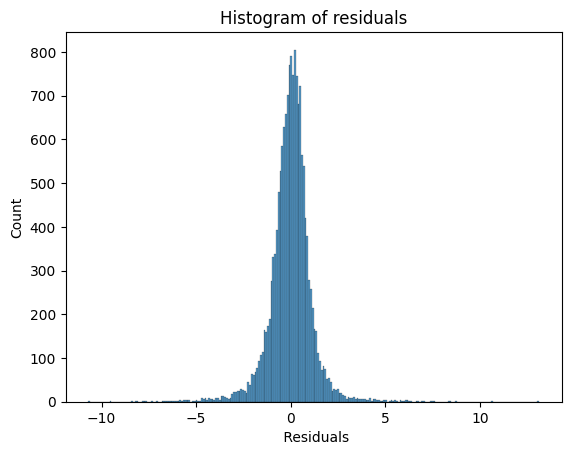

In [33]:
import seaborn as sns

sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [34]:
from scipy import stats

res = stats.shapiro(errors)
res.statistic


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15856.
  res = hypotest_fun_out(*samples, **kwds)


np.float64(0.8993989696042786)

<Axes: ylabel='selling_price'>

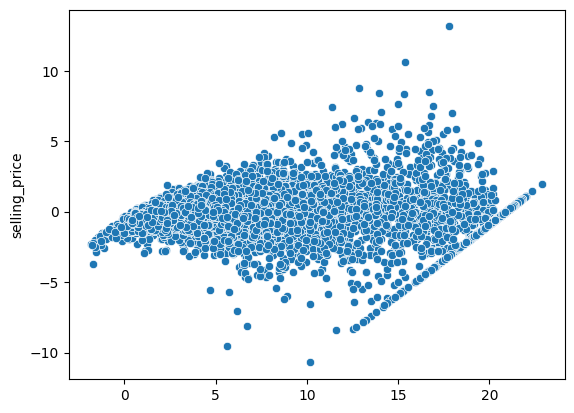

In [35]:
sns.scatterplot(x=Y_hat, y=errors)

In [ ]:
# Performing the Goldfeld-Quandt test to check for homoscedasticity
from statsmodels.stats.api import het_goldfeldquandt
import statsmodels.stats.api as sms

In [37]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X2_sm)

In [38]:
list(zip(name, test))

[('F statistic', np.float64(1.0208669021785592)),
 ('p-value', np.float64(0.17914292731589576))]

From the goldfeld-quandt test:

- F Statistic comes out to be 1.00 => Implying minimal difference in variance between groups
p-value of 0.21 indicates that this difference is statistically significant at conventional levels of significance (e.g., 0.05).
- Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.